In [71]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import time
import numpy as np
import pylab as plt

import localpaths
import subimage

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
si = subimage.parse_LISA('~/Data/LISA/allAnnotations.csv')

['aiua120214-0', 'aiua120214-1', 'aiua120214-2', 'aiua120306-0', 'aiua120306-1', 'vid0', 'vid1', 'vid10', 'vid11', 'vid2', 'vid3', 'vid4', 'vid5', 'vid6', 'vid7', 'vid8', 'vid9']


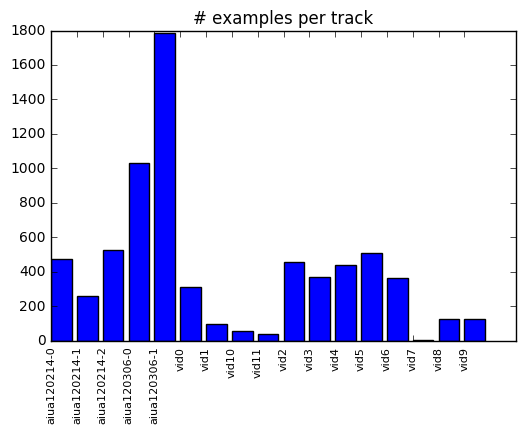

In [58]:
# Take a look at class representation across the various data cuts
all_tracks = list({x : 0 for x in si._gid}.keys())
all_tracks.sort()
print(all_tracks)

y_all = np.array(si._y)
examples_per_track = np.zeros((len(all_tracks),))

for ii, track_id in enumerate(all_tracks):
    idx = [x for x in range(len(si._y)) if si._gid[x] == track_id]
    idx = np.array(idx, dtype=np.int32)
    y_vals = y_all[idx]
    
    examples_per_track[ii] = y_vals.size
    
    #plt.figure()
    #plt.hist(y_vals, np.max(y_all))
    #plt.title('class labels for track %s' % track_id)

    
plt.figure()
plt.bar(range(len(all_tracks)), examples_per_track)
plt.gca().set_xticks(np.arange(len(all_tracks)))
plt.gca().set_xticklabels(all_tracks, rotation='vertical', fontsize=8)
plt.title('# examples per track')
plt.show()

In [ ]:
# Propose a track-based train/test split
train_grp = ['aiua120214-0', 'aiua120214-1', 'aiua120306-1'] + ['vid%d' % x for x in range(6)]
test_grp = ['aiua120214-2', 'aiua120306-0'] + ['vid%d' % x for x in range(6,12)]

train_idx = []
test_idx = []

for gid in train_grp:
    indices = [x for x in range(len(si._y)) if si._gid[x] == gid]
    assert(len(indices) > 0)
    train_idx.extend(indices)
    
for gid in test_grp:
    indices = [x for x in range(len(si._y)) if si._gid[x] == gid]
    assert(len(indices) > 0)
    test_idx.extend(indices)

train_idx = np.array(train_idx, np.int32)
test_idx = np.array(test_idx, np.int32)
                   
print('# train, # test:', len(train_idx), len(test_idx))

tic = time.time()
x_train, y_train = si.get_subimages(train_idx, verbose=True)
x_test, y_test = si.get_subimages(test_idx, verbose=True)
print(time.time() - toc, ' seconds to load images')

plt.figure()
plt.hist(y_train, np.max(y_all)+1)
plt.title('Class distribution for train set')

plt.figure()
plt.hist(y_test, np.max(y_all)+1)
plt.title('Class distribution for test set')

plt.show()

# train, # test: 4687 2279
loading image 0 (of 4687)
loading image 500 (of 4687)
loading image 2500 (of 4687)
loading image 3000 (of 4687)
